In [390]:
import tensorflow as tf
from keras.utils import normalize
from keras.models import Sequential
from keras.layers import Flatten, Dense, LSTM
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [391]:
plt.rcParams["figure.figsize"] = (20, 10)

In [392]:
s_weather_df = pd.read_csv('SWeather2018b.csv', sep=';', decimal=',')
pd.options.display.max_rows = 10
display(s_weather_df)

,MedTemp
0,6.2
1,7.0
2,7.8
3,7.7
4,5.8
...,...
1885,9.2
1886,9.2
1887,11.1
1888,9.9


In [393]:
s = s_weather_df['MedTemp']

In [394]:
dataset = s_weather_df.values
dataset = dataset.astype('float32')

In [395]:
print(s_weather_df.columns)
if s_weather_df.columns.contains('Datum'):
     s_weather_df = s_weather_df.drop(['Datum'], axis=1)
s_weather_df

Index(['MedTemp'], dtype='object')


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The 'contains' method is deprecated and will be removed in a future version. Use 'key in index' instead of 'index.contains(key)'
  


,MedTemp
0,6.2
1,7.0
2,7.8
3,7.7
4,5.8
...,...
1885,9.2
1886,9.2
1887,11.1
1888,9.9


In [396]:
s_weather_df

,MedTemp
0,6.2
1,7.0
2,7.8
3,7.7
4,5.8
...,...
1885,9.2
1886,9.2
1887,11.1
1888,9.9


In [422]:
lastN = 3
until = 1
x = []
for i in range(lastN, s.size):
    x_inputs = []
    for j in range(0, until):
        for k in range(i - lastN, i):
            x_inputs.append(s_weather_df.iloc[k, j])
    x.append(x_inputs)

y = []
for i in range(lastN, s.size):
    y.append(s_weather_df.iloc[i, 0])

for i in range(len(y)):
    print(x[i], y[i])

[6.2, 7.0, 7.8] 7.7
[7.0, 7.8, 7.7] 5.8
[7.8, 7.7, 5.8] 7.1
[7.7, 5.8, 7.1] 11.4
[5.8, 7.1, 11.4] 11.7
[7.1, 11.4, 11.7] 11.8
[11.4, 11.7, 11.8] 6.1
[11.7, 11.8, 6.1] 4.6
[11.8, 6.1, 4.6] 3.6
[6.1, 4.6, 3.6] 5.5
[4.6, 3.6, 5.5] 6.0
[3.6, 5.5, 6.0] 4.6
[5.5, 6.0, 4.6] 7.4
[6.0, 4.6, 7.4] 6.5
[4.6, 7.4, 6.5] 3.5
[7.4, 6.5, 3.5] 3.3
[6.5, 3.5, 3.3] 4.2
[3.5, 3.3, 4.2] 4.9
[3.3, 4.2, 4.9] 5.4
[4.2, 4.9, 5.4] 5.1
[4.9, 5.4, 5.1] 3.2
[5.4, 5.1, 3.2] 3.7
[5.1, 3.2, 3.7] 4.7
[3.2, 3.7, 4.7] 3.9
[3.7, 4.7, 3.9] 3.6
[4.7, 3.9, 3.6] 0.7
[3.9, 3.6, 0.7] 1.3
[3.6, 0.7, 1.3] 1.7
[0.7, 1.3, 1.7] 5.1
[1.3, 1.7, 5.1] 4.2
[1.7, 5.1, 4.2] 3.3
[5.1, 4.2, 3.3] 5.1
[4.2, 3.3, 5.1] 3.8
[3.3, 5.1, 3.8] 8.1
[5.1, 3.8, 8.1] 9.0
[3.8, 8.1, 9.0] 6.2
[8.1, 9.0, 6.2] 5.8
[9.0, 6.2, 5.8] 4.3
[6.2, 5.8, 4.3] 5.4
[5.8, 4.3, 5.4] 5.6
[4.3, 5.4, 5.6] 6.7
[5.4, 5.6, 6.7] 6.1
[5.6, 6.7, 6.1] 8.8
[6.7, 6.1, 8.8] 7.1
[6.1, 8.8, 7.1] 7.2
[8.8, 7.1, 7.2] 6.4
[7.1, 7.2, 6.4] 8.2
[7.2, 6.4, 8.2] 8.6
[6.4, 8.2, 8.6] 7.4
[8.2, 8.

[12.3, 10.1, 7.3] 7.0
[10.1, 7.3, 7.0] 6.3
[7.3, 7.0, 6.3] 12.8
[7.0, 6.3, 12.8] 11.2
[6.3, 12.8, 11.2] 5.3
[12.8, 11.2, 5.3] 4.3
[11.2, 5.3, 4.3] 7.3
[5.3, 4.3, 7.3] 8.9
[4.3, 7.3, 8.9] 7.1
[7.3, 8.9, 7.1] 8.8
[8.9, 7.1, 8.8] 8.5
[7.1, 8.8, 8.5] 3.9
[8.8, 8.5, 3.9] 4.6
[8.5, 3.9, 4.6] 4.9
[3.9, 4.6, 4.9] 6.0
[4.6, 4.9, 6.0] 6.6
[4.9, 6.0, 6.6] 4.3
[6.0, 6.6, 4.3] 2.7
[6.6, 4.3, 2.7] 2.3
[4.3, 2.7, 2.3] 5.3
[2.7, 2.3, 5.3] 3.1
[2.3, 5.3, 3.1] 4.7
[5.3, 3.1, 4.7] 11.5
[3.1, 4.7, 11.5] 12.0
[4.7, 11.5, 12.0] 5.4
[11.5, 12.0, 5.4] 4.4
[12.0, 5.4, 4.4] 3.0
[5.4, 4.4, 3.0] 2.5
[4.4, 3.0, 2.5] 3.2
[3.0, 2.5, 3.2] 3.6
[2.5, 3.2, 3.6] 3.1
[3.2, 3.6, 3.1] 3.3
[3.6, 3.1, 3.3] 5.1
[3.1, 3.3, 5.1] 3.8
[3.3, 5.1, 3.8] 4.6
[5.1, 3.8, 4.6] 5.7
[3.8, 4.6, 5.7] 4.1
[4.6, 5.7, 4.1] 3.9
[5.7, 4.1, 3.9] 2.7
[4.1, 3.9, 2.7] 2.3
[3.9, 2.7, 2.3] 4.6
[2.7, 2.3, 4.6] 4.6
[2.3, 4.6, 4.6] 6.1
[4.6, 4.6, 6.1] 6.3
[4.6, 6.1, 6.3] 5.8
[6.1, 6.3, 5.8] 2.8
[6.3, 5.8, 2.8] 5.0
[5.8, 2.8, 5.0] 6.2
[2.8, 5.0, 6.2] 7.5
[

[18.9, 23.4, 23.3] 20.0
[23.4, 23.3, 20.0] 21.8
[23.3, 20.0, 21.8] 24.2
[20.0, 21.8, 24.2] 21.3
[21.8, 24.2, 21.3] 18.9
[24.2, 21.3, 18.9] 21.9
[21.3, 18.9, 21.9] 24.3
[18.9, 21.9, 24.3] 27.1
[21.9, 24.3, 27.1] 27.0
[24.3, 27.1, 27.0] 28.6
[27.1, 27.0, 28.6] 27.3
[27.0, 28.6, 27.3] 23.9
[28.6, 27.3, 23.9] 22.7
[27.3, 23.9, 22.7] 24.9
[23.9, 22.7, 24.9] 22.7
[22.7, 24.9, 22.7] 22.2
[24.9, 22.7, 22.2] 18.5
[22.7, 22.2, 18.5] 19.1
[22.2, 18.5, 19.1] 17.7
[18.5, 19.1, 17.7] 17.6
[19.1, 17.7, 17.6] 19.9
[17.7, 17.6, 19.9] 22.2
[17.6, 19.9, 22.2] 24.3
[19.9, 22.2, 24.3] 25.8
[22.2, 24.3, 25.8] 25.5
[24.3, 25.8, 25.5] 26.7
[25.8, 25.5, 26.7] 24.7
[25.5, 26.7, 24.7] 22.0
[26.7, 24.7, 22.0] 20.3
[24.7, 22.0, 20.3] 20.5
[22.0, 20.3, 20.5] 18.7
[20.3, 20.5, 18.7] 19.2
[20.5, 18.7, 19.2] 17.7
[18.7, 19.2, 17.7] 19.9
[19.2, 17.7, 19.9] 23.2
[17.7, 19.9, 23.2] 25.8
[19.9, 23.2, 25.8] 27.2
[23.2, 25.8, 27.2] 21.2
[25.8, 27.2, 21.2] 22.6
[27.2, 21.2, 22.6] 23.0
[21.2, 22.6, 23.0] 20.8
[22.6, 23.0, 20.

[12.1, 14.0, 13.4] 12.2
[14.0, 13.4, 12.2] 8.5
[13.4, 12.2, 8.5] 4.9
[12.2, 8.5, 4.9] 6.0
[8.5, 4.9, 6.0] 7.2
[4.9, 6.0, 7.2] 8.3
[6.0, 7.2, 8.3] 9.0
[7.2, 8.3, 9.0] 9.9
[8.3, 9.0, 9.9] 10.4
[9.0, 9.9, 10.4] 11.4
[9.9, 10.4, 11.4] 10.3
[10.4, 11.4, 10.3] 10.5
[11.4, 10.3, 10.5] 11.5
[10.3, 10.5, 11.5] 11.6
[10.5, 11.5, 11.6] 10.9
[11.5, 11.6, 10.9] 11.6
[11.6, 10.9, 11.6] 13.1
[10.9, 11.6, 13.1] 14.3
[11.6, 13.1, 14.3] 11.8
[13.1, 14.3, 11.8] 7.7
[14.3, 11.8, 7.7] 5.5
[11.8, 7.7, 5.5] 5.8
[7.7, 5.5, 5.8] 5.1
[5.5, 5.8, 5.1] 4.2
[5.8, 5.1, 4.2] 2.8
[5.1, 4.2, 2.8] 3.3
[4.2, 2.8, 3.3] 1.2
[2.8, 3.3, 1.2] 4.2
[3.3, 1.2, 4.2] 4.4
[1.2, 4.2, 4.4] 7.2
[4.2, 4.4, 7.2] 6.1
[4.4, 7.2, 6.1] 5.1
[7.2, 6.1, 5.1] 4.3
[6.1, 5.1, 4.3] 4.5
[5.1, 4.3, 4.5] 6.0
[4.3, 4.5, 6.0] 6.9
[4.5, 6.0, 6.9] 8.1
[6.0, 6.9, 8.1] 11.0
[6.9, 8.1, 11.0] 13.1
[8.1, 11.0, 13.1] 8.7
[11.0, 13.1, 8.7] 7.2
[13.1, 8.7, 7.2] 10.5
[8.7, 7.2, 10.5] 12.1
[7.2, 10.5, 12.1] 7.6
[10.5, 12.1, 7.6] 8.4
[12.1, 7.6, 8.4] 5.8
[7.6, 8.4,

In [445]:
scaler = MinMaxScaler(feature_range=(0, 1))
xs = scaler.fit_transform(x)
xs

array([[0.35051546, 0.37113402, 0.39175258],
       [0.37113402, 0.39175258, 0.38917526],
       [0.39175258, 0.38917526, 0.34020619],
       ...,
       [0.50773196, 0.42783505, 0.42783505],
       [0.42783505, 0.42783505, 0.47680412],
       [0.42783505, 0.47680412, 0.44587629]])

In [446]:
'''
lastN = 3
until = 1
x = []
for i in range(lastN, s.size):
    x_inputs = []
    for j in range(0, until):
        for k in range(i - lastN, i):
            x_inputs.append(s_weather_df[k][j])
    x.append(x_inputs)

y = []
for i in range(lastN, s.size):
    y.append(s_weather_df[i][0])
x
'''

'\nlastN = 3\nuntil = 1\nx = []\nfor i in range(lastN, s.size):\n    x_inputs = []\n    for j in range(0, until):\n        for k in range(i - lastN, i):\n            x_inputs.append(s_weather_df[k][j])\n    x.append(x_inputs)\n\ny = []\nfor i in range(lastN, s.size):\n    y.append(s_weather_df[i][0])\nx\n'

In [447]:
'''
x = np.array(x)
x = np.reshape(x, (x.shape[0], 1, x.shape[1]))
x
'''

'\nx = np.array(x)\nx = np.reshape(x, (x.shape[0], 1, x.shape[1]))\nx\n'

In [448]:
y

[7.7,
 5.8,
 7.1,
 11.4,
 11.7,
 11.8,
 6.1,
 4.6,
 3.6,
 5.5,
 6.0,
 4.6,
 7.4,
 6.5,
 3.5,
 3.3,
 4.2,
 4.9,
 5.4,
 5.1,
 3.2,
 3.7,
 4.7,
 3.9,
 3.6,
 0.7,
 1.3,
 1.7,
 5.1,
 4.2,
 3.3,
 5.1,
 3.8,
 8.1,
 9.0,
 6.2,
 5.8,
 4.3,
 5.4,
 5.6,
 6.7,
 6.1,
 8.8,
 7.1,
 7.2,
 6.4,
 8.2,
 8.6,
 7.4,
 5.7,
 7.3,
 6.8,
 8.7,
 8.6,
 7.2,
 7.4,
 6.7,
 6.2,
 6.0,
 8.0,
 8.0,
 6.0,
 7.6,
 9.2,
 10.8,
 9.9,
 9.1,
 10.4,
 10.9,
 11.2,
 8.6,
 11.3,
 12.8,
 12.5,
 11.6,
 13.9,
 16.0,
 11.5,
 7.2,
 5.1,
 5.4,
 5.5,
 8.2,
 11.1,
 12.5,
 13.6,
 13.8,
 14.8,
 16.4,
 17.3,
 16.9,
 14.0,
 15.4,
 16.0,
 13.7,
 10.8,
 12.6,
 14.0,
 14.9,
 14.7,
 10.8,
 6.8,
 8.0,
 10.1,
 8.0,
 9.6,
 13.5,
 12.4,
 14.2,
 15.6,
 16.8,
 17.6,
 16.2,
 12.2,
 12.2,
 14.0,
 14.0,
 13.0,
 12.0,
 8.4,
 10.9,
 13.5,
 17.2,
 15.5,
 15.0,
 16.5,
 15.1,
 12.2,
 9.8,
 10.4,
 11.8,
 11.0,
 13.3,
 14.1,
 16.0,
 18.4,
 20.9,
 22.3,
 21.5,
 17.5,
 15.9,
 17.5,
 16.0,
 15.6,
 15.7,
 16.0,
 12.2,
 14.3,
 16.0,
 16.8,
 16.9,
 16.3,
 15.9,
 20.

In [449]:
ys = scaler.fit_transform(np.array(y).reshape(-1, 1))
ys

array([[0.38917526],
       [0.34020619],
       [0.37371134],
       ...,
       [0.47680412],
       [0.44587629],
       [0.36340206]])

In [451]:
xs = np.reshape(xs, (xs.shape[0], 1, xs.shape[1]))
xs

array([[[0.35051546, 0.37113402, 0.39175258]],

       [[0.37113402, 0.39175258, 0.38917526]],

       [[0.39175258, 0.38917526, 0.34020619]],

       ...,

       [[0.50773196, 0.42783505, 0.42783505]],

       [[0.42783505, 0.42783505, 0.47680412]],

       [[0.42783505, 0.47680412, 0.44587629]]])

In [452]:
model = Sequential()
model.add(LSTM(lastN, input_shape=(1, lastN)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(xs, ys, epochs=150, batch_size=32, verbose=2, shuffle=False)

Epoch 1/150
 - 1s - loss: 0.1659 - accuracy: 5.2994e-04
Epoch 2/150
 - 0s - loss: 0.0816 - accuracy: 5.2994e-04
Epoch 3/150
 - 0s - loss: 0.0401 - accuracy: 5.2994e-04
Epoch 4/150
 - 0s - loss: 0.0244 - accuracy: 0.0011
Epoch 5/150
 - 0s - loss: 0.0196 - accuracy: 0.0011
Epoch 6/150
 - 0s - loss: 0.0176 - accuracy: 0.0011
Epoch 7/150
 - 0s - loss: 0.0161 - accuracy: 0.0011
Epoch 8/150
 - 0s - loss: 0.0146 - accuracy: 0.0011
Epoch 9/150
 - 0s - loss: 0.0133 - accuracy: 0.0011
Epoch 10/150
 - 0s - loss: 0.0120 - accuracy: 0.0011
Epoch 11/150
 - 0s - loss: 0.0108 - accuracy: 0.0011
Epoch 12/150
 - 0s - loss: 0.0097 - accuracy: 0.0011
Epoch 13/150
 - 0s - loss: 0.0088 - accuracy: 0.0011
Epoch 14/150
 - 0s - loss: 0.0079 - accuracy: 0.0011
Epoch 15/150
 - 0s - loss: 0.0071 - accuracy: 0.0011
Epoch 16/150
 - 0s - loss: 0.0065 - accuracy: 0.0011
Epoch 17/150
 - 0s - loss: 0.0060 - accuracy: 0.0011
Epoch 18/150
 - 0s - loss: 0.0055 - accuracy: 0.0011
Epoch 19/150
 - 0s - loss: 0.0052 - accurac

In [453]:
s_weather_to_predict_df = pd.read_csv('STemp201903b.csv', sep=';', decimal=',')
pd.options.display.max_rows = 20
display(s_weather_to_predict_df)

,A
0,9.2
1,9.2
2,11.1
3,9.9
4,6.7
...,...
209,16.9
210,17.2
211,16.0
212,17.4


In [454]:
print(s_weather_to_predict_df.columns)
if s_weather_to_predict_df.columns.contains('Datum'):
     s_weather_to_predict_df = s_weather_to_predict_df.drop(['Datum'], axis=1)
s_weather_to_predict_df

Index(['A'], dtype='object')


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The 'contains' method is deprecated and will be removed in a future version. Use 'key in index' instead of 'index.contains(key)'
  


,A
0,9.2
1,9.2
2,11.1
3,9.9
4,6.7
...,...
209,16.9
210,17.2
211,16.0
212,17.4


In [455]:
tlen = len(s_weather_to_predict_df)
print(tlen)
x_test = []

for i in range(lastN, tlen):
    x_inputs = []
    for j in range(0, until):
        for k in range(i - lastN, i):
            #print(k, j)
            x_inputs.append(s_weather_to_predict_df.iloc[k, j])
    x_test.append(x_inputs)
    
y_test = []
for i in range(lastN, tlen):
    y_test.append(s_weather_to_predict_df.iloc[i, 0])
    
for i in range(len(y_test)):
    print(x_test[i], y_test[i])

214
[9.2, 9.2, 11.1] 9.9
[9.2, 11.1, 9.9] 6.7
[11.1, 9.9, 6.7] 10.7
[9.9, 6.7, 10.7] 10.9
[6.7, 10.7, 10.9] 9.2
[10.7, 10.9, 9.2] 10.2
[10.9, 9.2, 10.2] 11.2
[9.2, 10.2, 11.2] 6.0
[10.2, 11.2, 6.0] 7.2
[11.2, 6.0, 7.2] 7.3
[6.0, 7.2, 7.3] 5.9
[7.2, 7.3, 5.9] 9.7
[7.3, 5.9, 9.7] 12.2
[5.9, 9.7, 12.2] 10.7
[9.7, 12.2, 10.7] 5.7
[12.2, 10.7, 5.7] 6.0
[10.7, 5.7, 6.0] 6.4
[5.7, 6.0, 6.4] 8.6
[6.0, 6.4, 8.6] 10.6
[6.4, 8.6, 10.6] 11.9
[8.6, 10.6, 11.9] 10.6
[10.6, 11.9, 10.6] 7.5
[11.9, 10.6, 7.5] 6.8
[10.6, 7.5, 6.8] 8.7
[7.5, 6.8, 8.7] 9.4
[6.8, 8.7, 9.4] 12.7
[8.7, 9.4, 12.7] 13.0
[9.4, 12.7, 13.0] 13.4
[12.7, 13.0, 13.4] 13.1
[13.0, 13.4, 13.1] 14.4
[13.4, 13.1, 14.4] 11.1
[13.1, 14.4, 11.1] 5.8
[14.4, 11.1, 5.8] 7.6
[11.1, 5.8, 7.6] 9.7
[5.8, 7.6, 9.7] 11.8
[7.6, 9.7, 11.8] 12.2
[9.7, 11.8, 12.2] 11.8
[11.8, 12.2, 11.8] 11.4
[12.2, 11.8, 11.4] 9.1
[11.8, 11.4, 9.1] 6.7
[11.4, 9.1, 6.7] 5.2
[9.1, 6.7, 5.2] 6.2
[6.7, 5.2, 6.2] 10.6
[5.2, 6.2, 10.6] 12.2
[6.2, 10.6, 12.2] 14.3
[10.6, 12.2

In [456]:
# scaler = MinMaxScaler(feature_range=(0, 1))
# s_weather_to_predict_df = scaler.fit_transform(s_weather_to_predict_df)
xt = scaler.fit_transform(x_test)
xt

array([[0.16194332, 0.16194332, 0.2388664 ],
       [0.16194332, 0.2388664 , 0.1902834 ],
       [0.2388664 , 0.1902834 , 0.06072874],
       [0.1902834 , 0.06072874, 0.22267206],
       [0.06072874, 0.22267206, 0.23076923],
       [0.22267206, 0.23076923, 0.16194332],
       [0.23076923, 0.16194332, 0.20242915],
       [0.16194332, 0.20242915, 0.24291498],
       [0.20242915, 0.24291498, 0.03238866],
       [0.24291498, 0.03238866, 0.08097166],
       [0.03238866, 0.08097166, 0.08502024],
       [0.08097166, 0.08502024, 0.02834008],
       [0.08502024, 0.02834008, 0.18218623],
       [0.02834008, 0.18218623, 0.28340081],
       [0.18218623, 0.28340081, 0.22267206],
       [0.28340081, 0.22267206, 0.02024291],
       [0.22267206, 0.02024291, 0.03238866],
       [0.02024291, 0.03238866, 0.048583  ],
       [0.03238866, 0.048583  , 0.13765182],
       [0.048583  , 0.13765182, 0.21862348],
       [0.13765182, 0.21862348, 0.27125506],
       [0.21862348, 0.27125506, 0.21862348],
       [0.

In [457]:
xt = np.reshape(xt, (xt.shape[0], 1, xt.shape[1]))
xt

array([[[0.16194332, 0.16194332, 0.2388664 ]],

       [[0.16194332, 0.2388664 , 0.1902834 ]],

       [[0.2388664 , 0.1902834 , 0.06072874]],

       [[0.1902834 , 0.06072874, 0.22267206]],

       [[0.06072874, 0.22267206, 0.23076923]],

       [[0.22267206, 0.23076923, 0.16194332]],

       [[0.23076923, 0.16194332, 0.20242915]],

       [[0.16194332, 0.20242915, 0.24291498]],

       [[0.20242915, 0.24291498, 0.03238866]],

       [[0.24291498, 0.03238866, 0.08097166]],

       [[0.03238866, 0.08097166, 0.08502024]],

       [[0.08097166, 0.08502024, 0.02834008]],

       [[0.08502024, 0.02834008, 0.18218623]],

       [[0.02834008, 0.18218623, 0.28340081]],

       [[0.18218623, 0.28340081, 0.22267206]],

       [[0.28340081, 0.22267206, 0.02024291]],

       [[0.22267206, 0.02024291, 0.03238866]],

       [[0.02024291, 0.03238866, 0.048583  ]],

       [[0.03238866, 0.048583  , 0.13765182]],

       [[0.048583  , 0.13765182, 0.21862348]],

       [[0.13765182, 0.21862348, 0.27125

In [458]:
y_test

[9.9,
 6.7,
 10.7,
 10.9,
 9.2,
 10.2,
 11.2,
 6.0,
 7.2,
 7.3,
 5.9,
 9.7,
 12.2,
 10.7,
 5.7,
 6.0,
 6.4,
 8.6,
 10.6,
 11.9,
 10.6,
 7.5,
 6.8,
 8.7,
 9.4,
 12.7,
 13.0,
 13.4,
 13.1,
 14.4,
 11.1,
 5.8,
 7.6,
 9.7,
 11.8,
 12.2,
 11.8,
 11.4,
 9.1,
 6.7,
 5.2,
 6.2,
 10.6,
 12.2,
 14.3,
 15.2,
 16.9,
 17.1,
 16.9,
 17.7,
 18.8,
 17.8,
 17.2,
 10.4,
 10.5,
 8.4,
 9.2,
 11.5,
 13.3,
 13.4,
 12.0,
 7.1,
 6.7,
 8.4,
 10.6,
 11.6,
 11.9,
 13.0,
 13.4,
 10.5,
 12.1,
 10.7,
 10.2,
 11.0,
 14.0,
 15.7,
 16.7,
 14.4,
 12.9,
 14.6,
 15.3,
 17.4,
 16.5,
 16.9,
 17.3,
 15.4,
 13.4,
 16.0,
 19.9,
 21.6,
 25.2,
 23.4,
 24.5,
 25.8,
 16.1,
 18.3,
 18.2,
 17.8,
 17.7,
 16.6,
 16.7,
 19.7,
 21.6,
 21.5,
 18.6,
 20.7,
 23.4,
 25.3,
 21.3,
 21.6,
 19.0,
 21.6,
 24.8,
 27.1,
 29.4,
 28.1,
 24.0,
 25.2,
 28.9,
 27.6,
 23.1,
 21.8,
 21.8,
 22.6,
 25.3,
 20.4,
 18.6,
 17.0,
 17.8,
 17.2,
 17.9,
 17.9,
 17.8,
 18.3,
 19.3,
 21.1,
 22.2,
 23.0,
 25.5,
 24.2,
 24.5,
 26.8,
 28.9,
 29.9,
 29.9,
 23.2,
 20.4,

In [487]:
# make predictions
# trainPredict = model.predict(x)
# print(trainPredict)
testPredict = model.predict(xt)
# invert predictions
#trainPredict = scaler.inverse_transform(trainPredict)

#print(testPredict)
#testPredict = scaler.inverse_transform([testPredict])
#nsamples, nx = testPredict.shape
# print(nsamples, nx)
#d2_train_dataset = testPredict.reshape((nsamples,nx))
# print(d2_train_dataset)
trainPredict_dataset_like = np.zeros(shape=(len(testPredict), 3))
# put the predicted values in the right field
trainPredict_dataset_like[:,0] = testPredict[:,0]
# inverse transform and then select the right field
testPredict = scaler.inverse_transform(trainPredict_dataset_like)[:,0]


#testPredict = scaler.inverse_transform(testPredict)

print(testPredict)
#print(np.reshape(testPredict, (testPredict.shape[0], 1, 1)))
#y_test = scaler.inverse_transform([y_test])


# calculate root mean squared error
'''
import math

trainScore = math.sqrt(mean_squared_error(y[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
'''

[11.51841995 10.19714891  7.30036606 11.34534146 11.17257693  9.53692047
 10.65134363 11.53005429  6.61035431  8.07588208  8.18361875  6.94830358
 10.4370849  12.47550208 10.87025353  6.31070596  7.0406519   7.51393285
  9.39310264 11.05922921 12.1700097  10.80201765  7.94375251  7.60537648
  9.44201764  9.93610771 13.05928732 13.08659654 13.54556718 13.20503635
 14.58964661 11.06789662  6.27214629  8.46227414 10.29917588 12.13024684
 12.37976045 11.97483701 11.61330401  9.38386878  7.35814796  6.33750854
  7.37743939 11.22988698 12.40940831 14.47435959 15.25624946 17.01916737
 17.09648472 16.94242566 17.81929676 18.87365091 17.7444351  17.26651237
 10.04662911 10.83626736  8.8208634   9.75584508 11.89600179 13.48698991
 13.4868633  12.08030202  7.40827443  7.50783706  9.18044165 11.0783874
 11.8742348  12.11441959 13.2136445  13.52553301 10.56215565 12.4589019
 10.8815982  10.51739015 11.34809197 14.2644064  15.74373362 16.74645061
 14.28989078 12.95930859 14.85046918 15.35770926 17.5

"\nimport math\n\ntrainScore = math.sqrt(mean_squared_error(y[0], trainPredict[:,0]))\nprint('Train Score: %.2f RMSE' % (trainScore))\ntestScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))\nprint('Test Score: %.2f RMSE' % (testScore))\n"

In [488]:
testPredict
print(len(testPredict))

211


In [380]:
dataset

array([[ 6.2],
       [ 7. ],
       [ 7.8],
       ...,
       [11.1],
       [ 9.9],
       [ 6.7]], dtype=float32)

In [491]:
yp = []
yt = []

for i in range(1, len(testPredict)):
    yp.append(testPredict[i])
    
for i in range(0, len(y_test) - 1):
    yt.append(y_test[i])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


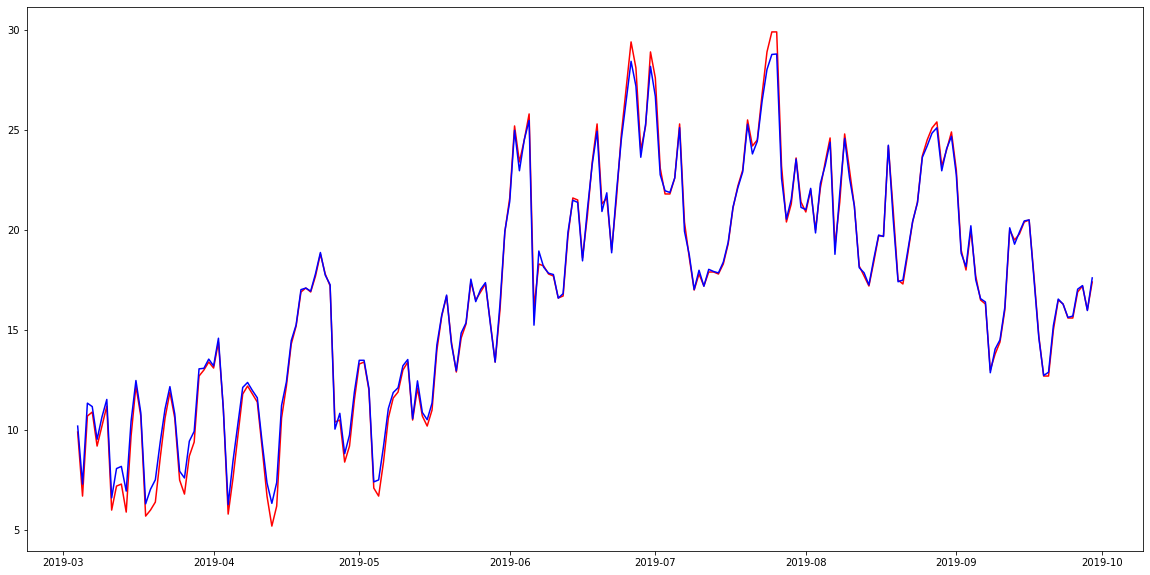

In [496]:
dates2 = np.arange('2019-03-04', '2019-09-30', dtype='datetime64[D]')
plt.plot(dates2, yt, c='red')
plt.plot(dates2, yp, c='blue')
plt.show()

In [495]:
ok_values = 0
bad_values = 0
threshold = 1

diffs = np.diff([yt, yp], axis=0).ravel()
for i in diffs:
    if i <= threshold and i >= -threshold:
        ok_values = ok_values + 1
    else:
        bad_values = bad_values + 1

print('Threshold: +/-', threshold)
print('Amount of good values', ok_values)
print('Amount of bad values', bad_values)
print('Percentage good/bad:', ok_values / (ok_values + bad_values), '/', bad_values / (ok_values + bad_values))

Threshold: +/- 1
Amount of good values 203
Amount of bad values 7
Percentage good/bad: 0.9666666666666667 / 0.03333333333333333


In [497]:
ok_values = 0
bad_values = 0
threshold = 0.5

diffs = np.diff([yt, yp], axis=0).ravel()
for i in diffs:
    if i <= threshold and i >= -threshold:
        ok_values = ok_values + 1
    else:
        bad_values = bad_values + 1

print('Threshold: +/-', threshold)
print('Amount of good values', ok_values)
print('Amount of bad values', bad_values)
print('Percentage good/bad:', ok_values / (ok_values + bad_values), '/', bad_values / (ok_values + bad_values))

Threshold: +/- 0.5
Amount of good values 176
Amount of bad values 34
Percentage good/bad: 0.8380952380952381 / 0.1619047619047619


In [535]:
xtt = xt[0]

diffs = []
random = 0

for i in range(random, len(yt)):
    #xtt = np.array(xtt)
    xtt = np.reshape([xtt], (xtt.shape[0], 1, xtt.shape[1]))
    #print(xtt)
    #xtt = np.array(xtt)
    #print(xtt)
    predictscaled = model.predict(xtt)
    t_dataset_like = np.zeros(shape=(len(predictscaled), 3))
    # put the predicted values in the right field
    t_dataset_like[:,0] = predictscaled[:,0]
    # inverse transform and then select the right field
    predict = scaler.inverse_transform(t_dataset_like)[:,0]
    # predict = scalery.inverse_transform(predictscaled)
    #print(abs(predict[0] - yi))
    yi = yt[i]
    diffs.append(abs(predict[0] - yi))
    if i < len(yt) - 1 :
        # xtt = xtt[1:]
        # xtt = np.append(xtt, predictscaled)
        # xtt[2] = predictscaled
        xtt = xtt.ravel()
        xtt = xtt[1:]
        xtt = np.append(xtt, predictscaled)
        xtt = np.array([xtt])

print(diffs)

[1.618419954180716, 5.062593027949332, 1.2915292084217072, 1.3045748233795162, 3.2020132780075077, 2.3859498679637916, 1.5582403451204296, 6.920384916663169, 5.87362541258335, 5.91899975836277, 7.457385405898094, 3.7895324587821957, 1.4160835474729545, 3.037594440579415, 8.154549503326415, 7.9673742115497586, 7.676438832283019, 5.582075354456901, 3.6845760166645043, 2.4842021405696855, 3.881187075376511, 7.075741350650787, 7.868054884672165, 6.0582969844341275, 5.4466251790523526, 2.2331808030605327, 2.018090468645095, 1.701473426818847, 2.0834386229515083, 0.864084696769714, 4.243501454591751, 9.621774286031723, 7.898979011178017, 5.875187769532204, 3.850466075539588, 3.5248764991760257, 3.9984749853610975, 4.471312326192855, 6.843438577651977, 9.314898642897607, 10.885733744502069, 9.95598510503769, 5.625686585903166, 4.094871312379837, 2.063570937514303, 1.2318141698837266, 0.40037322640418793, 0.5329662233591108, 0.26594347357749726, 0.9992821574211135, 2.032964608073236, 0.9669753

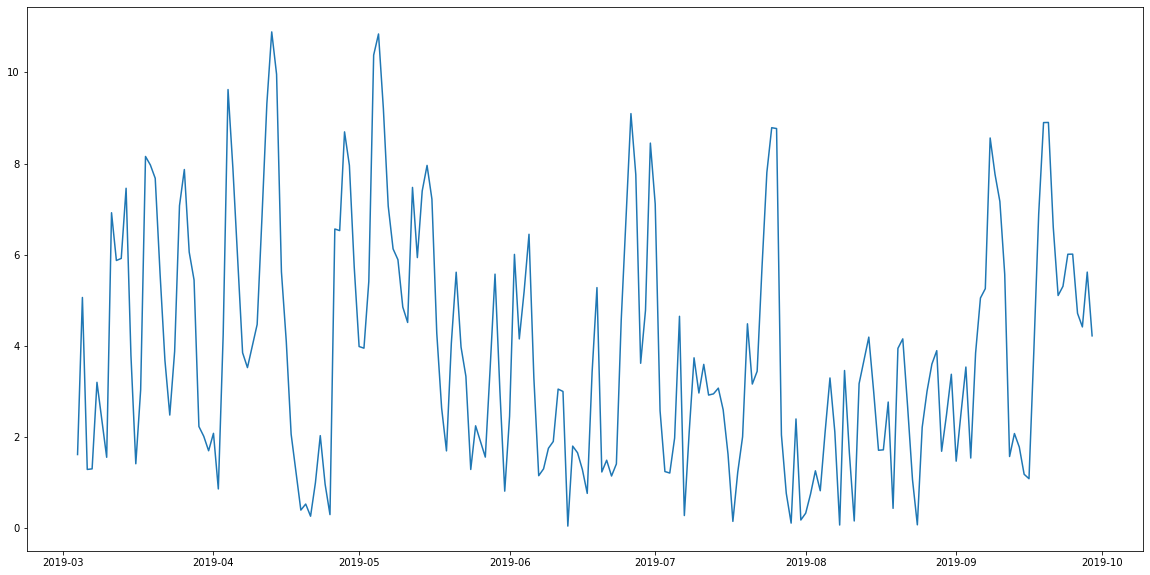

In [536]:
deltas = np.array(diffs)

plt.plot(dates2[random:], deltas)
plt.show()